In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_name = 'Robot'
itr = '1000'
command = 'no'
real_data = pd.read_csv(file_name+'.csv')
sensitive_id = 'Region'
Target_id = 'Failure'
G1 = 'Urban'
G2 = 'Rural'

In [3]:
real_data.head()

,Robot_ID,Region,Motor_Temperature,Vibration_Level,Power_Consumption,Failure
0,Robot_1,Rural,43.009055,0.111046,14.831527,No
1,Robot_2,Rural,56.970652,0.110239,19.304053,No
2,Robot_3,Urban,57.672126,0.096985,11.579602,No
3,Robot_1,Urban,48.314255,0.134849,18.806753,No
4,Robot_2,Rural,48.154329,0.077560,11.836170,No


In [4]:
real_data[sensitive_id] = real_data[sensitive_id].map({G1: 0, G2: 1})
real_data[Target_id] = real_data[Target_id].map({'No': 0, 'Yes': 1})
pivot_sensitive = pd.pivot_table(real_data,values=Target_id, index = sensitive_id, aggfunc=['sum', 'count'])
pivot_sensitive['sum']/pivot_sensitive['count']

,Failure
Region,
0,0.185085
1,0.394444


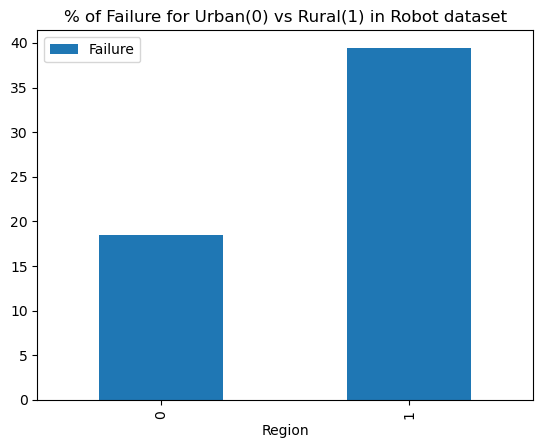

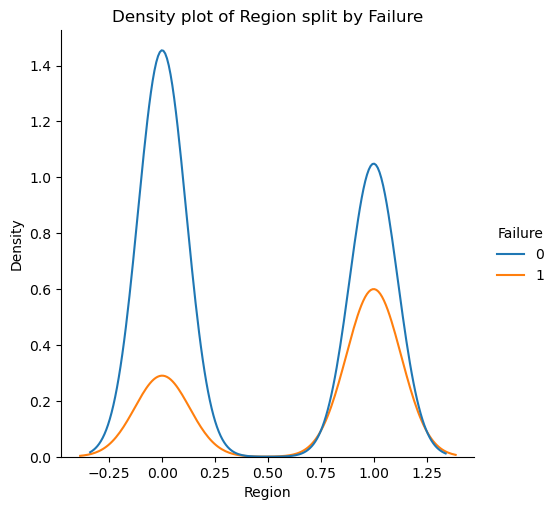

In [5]:
bar_plot = (pivot_sensitive['sum']/pivot_sensitive['count']*100).plot.bar(title=f'% of {Target_id} for {G1}(0) vs {G2}(1) in '+file_name+' dataset')
bar_plot.get_figure().savefig('Bar_plot_'+file_name+'.png')
density_plot = sns.displot(real_data, x=sensitive_id, hue=Target_id, kind="kde")
density_plot.set(title=f'Density plot of {sensitive_id} split by {Target_id}')
density_plot.savefig('Density_plot_'+file_name+'.png')

In [13]:
synthetic_data = pd.read_csv('TimeFairGAN_with_fairness_Synthetic_Robot_1000.csv')
command = 'with'
synthetic_data.head()

,Robot_ID,Region,Motor_Temperature,Vibration_Level,Power_Consumption,Failure
0,Robot_1,Rural,50.139347,0.112302,14.123323,Yes
1,Robot_2,Rural,45.613613,0.082999,11.600509,Yes
2,Robot_3,Rural,54.585810,0.123843,11.920198,No
3,Robot_1,Rural,50.144870,0.112407,14.117840,Yes
4,Robot_2,Rural,45.613583,0.082999,11.600439,Yes


In [15]:
synthetic_data[sensitive_id] = synthetic_data[sensitive_id].map({G1: 0, G2: 1})
synthetic_data[Target_id] = synthetic_data[Target_id].map({'No': 0, 'Yes': 1})
pivot_sensitive_synthetic = pd.pivot_table(synthetic_data,values=Target_id, index = sensitive_id, aggfunc=['sum', 'count'])
pivot_sensitive_synthetic['sum']/pivot_sensitive_synthetic['count']

,Failure
Region,
0,0.197570
1,0.610716


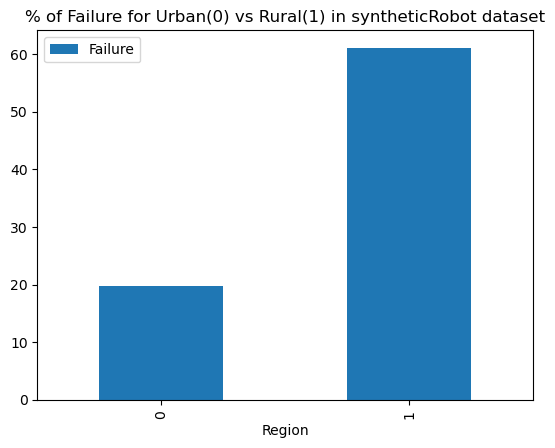

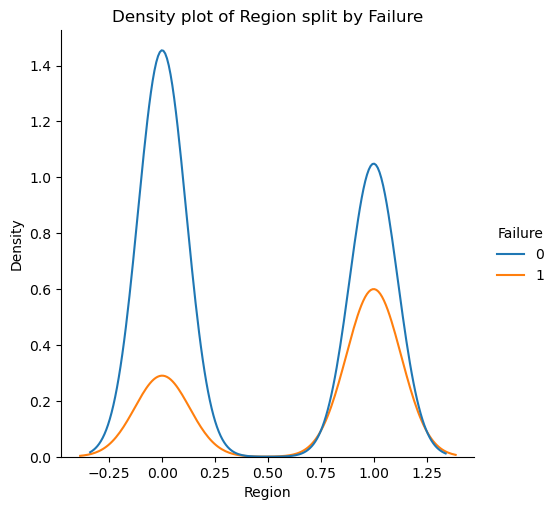

In [16]:
bar_plot_synthetic = (pivot_sensitive_synthetic['sum']/pivot_sensitive_synthetic['count']*100).plot.bar(title=f'% of {Target_id} for {G1}(0) vs {G2}(1) in synthetic'+file_name+' dataset')
bar_plot_synthetic.get_figure().savefig('Bar_plot_synthetic_'+file_name+'_'+itr+'_'+command+'.png')
density_plot = sns.displot(real_data, x=sensitive_id, hue=Target_id, kind="kde")
density_plot.set(title=f'Density plot of {sensitive_id} split by {Target_id}')
density_plot.savefig('Density_plot_synthetic_'+file_name+'_'+itr+'_'+command+'.png')